# 01. Nibabel Intro

* 싸이그래머 / 딥뉴로 : 파트 1 - 뉴로이미징 [1]
* 김무성

# Contents
* Nibabel?
* Installation
* Tutorials

# Nibabel? 

#### 참고 
* [1] nibable - http://nipy.org/packages/nibabel/index.html

Nibabel aims to provide 
* read/write access to some common neuroimaging file formats.
* This package provides read +/- write access to some common medical and neuroimaging file formats, including: 
    - ANALYZE (plain, SPM99, SPM2 and later), 
    - GIFTI, 
    - NIfTI1, 
    - NIfTI2, 
    - MINC1, 
    - MINC2, 
    - MGH and 
    - ECAT as well as 
    - Philips PAR/REC. 
* We can read and write Freesurfer geometry, and read Freesurfer morphometry and annotation files. 
* There is some very limited support for DICOM. 
* NiBabel is the successor of PyNIfTI.
* The various image format classes give full or selective access to header (meta) information and access to the image data is made available via NumPy arrays.

# Installation

#### 참고
* [2] nibable installation -http://nipy.org/nibabel/installation.html

In [1]:
!pip install nibabel

Downloading/unpacking nibabel
  Running setup.py (path:/Users/moodern/.venv/deepneuro/build/nibabel/setup.py) egg_info for package nibabel
    
  Running setup.py install for nibabel
    changing mode of build/scripts-2.7/parrec2nii from 644 to 755
    changing mode of build/scripts-2.7/nib-ls from 644 to 755
    changing mode of build/scripts-2.7/nib-dicomfs from 644 to 755
    changing mode of build/scripts-2.7/nib-nifti-dx from 644 to 755
    
    changing mode of /Users/moodern/.venv/deepneuro/bin/nib-dicomfs to 755
    changing mode of /Users/moodern/.venv/deepneuro/bin/nib-ls to 755
    changing mode of /Users/moodern/.venv/deepneuro/bin/nib-nifti-dx to 755
    changing mode of /Users/moodern/.venv/deepneuro/bin/parrec2nii to 755
Cleaning up...


# Tutorials

* Coordinate systems and affines
* Radiological vs neurological conventions
* Introduction to DICOM

#### 참고
* [3] General tutorials - http://nipy.org/nibabel/tutorials.html#tutorials
* [4] Echo-planar imaging (EPI) and functional MRI - http://www.brainmapping.org/MarkCohen/Papers/EPI-fMRI.html

## Coordinate systems and affines

* Introducing Someone
* Voxel coordinates are coordinates in the image data array
* Voxel coordinates and points in space
* The scanner-subject reference space
* Voxel coordinates are in voxel space
* The affine matrix as a transformation between spaces
* The inverse of the affine gives the mapping from scanner to voxel
* The affine by example
* Other reference spaces
* Nibabel always uses an RAS+ output space

A nibabel (and nipy) image is the association of three things:
* The image data array: 
    - a 3D or 4D array of image data
* An affine array 
    - that tells you the position of the image array data in a reference space.
* image metadata 
    - (data about the data) describing the image, usually in the form of an image header.

This document describes 
* how the affine array describes the position of the image data in a reference space. 
* On the way we will define 
    - what we mean by reference space, and 
    - the reference spaces that Nibabel uses.

### Introducing Someone

#### test data
* somones_epi.nii.gz - http://nipy.org/nibabel/_downloads/someones_epi.nii.gz
* somones_anatomy.nii.gz - http://nipy.org/nibabel/_downloads/someones_anatomy.nii.gz

#### download
최초에(디렉토리가 원래 없다는 가정하에) 현재 위치에서 downloads 라는 디렉토리를 만든다.

In [2]:
!mkdir downloads

donwloads 폴더에 테스트 데이터들을 다운받는다.

In [3]:
!wget http://nipy.org/nibabel/_downloads/someones_epi.nii.gz -O downloads/someones_epi.nii.gz

--2016-04-08 15:06:06--  http://nipy.org/nibabel/_downloads/someones_epi.nii.gz
Resolving nipy.org... 192.30.252.153, 192.30.252.154
Connecting to nipy.org|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93766 (92K) [application/octet-stream]
Saving to: 'downloads/someones_epi.nii.gz'

downloads/someones_ 100%[=====================>]  91.57K   188KB/s   in 0.5s   

2016-04-08 15:06:08 (188 KB/s) - 'downloads/someones_epi.nii.gz' saved [93766/93766]



In [6]:
!ls *

01_nibabel.ipynb

downloads:
someones_epi.nii.gz


#### We can load up the EPI image to get the image data array:

In [8]:
import nibabel as nib

In [9]:
epi_img = nib.load('downloads/someones_epi.nii.gz')

In [10]:
epi_img_data = epi_img.get_data()

In [11]:
epi_img_data.shape

(53, 61, 33)

#### Then we have a look at slices over the first, second and third dimensions of the array.

In [13]:
%matplotlib inline

/Users/moodern/.venv/deepneuro/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [14]:
import matplotlib.pyplot as plt

In [15]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [16]:
slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]

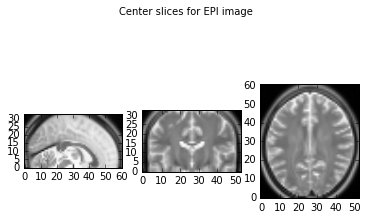

In [17]:
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

#### We collected an anatomical image in the same session. We can load that image and look at slices in the three axes:

In [19]:
# 데이터를 다운 받는다(최초 한번만)
!wget http://nipy.org/nibabel/_downloads/someones_anatomy.nii.gz -O downloads/someones_anatomy.nii.gz

--2016-04-08 16:02:48--  http://nipy.org/nibabel/_downloads/someones_anatomy.nii.gz
Resolving nipy.org... 192.30.252.153, 192.30.252.154
Connecting to nipy.org|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191449 (187K) [application/octet-stream]
Saving to: 'downloads/someones_anatomy.nii.gz'

downloads/someones_ 100%[=====================>] 186.96K   282KB/s   in 0.7s   

2016-04-08 16:02:49 (282 KB/s) - 'downloads/someones_anatomy.nii.gz' saved [191449/191449]



In [20]:
anat_img = nib.load('downloads/someones_anatomy.nii.gz')
anat_img_data = anat_img.get_data()
print anat_img_data.shape

(57, 67, 56)


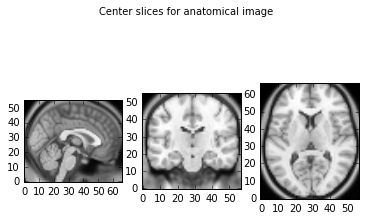

In [21]:
show_slices([anat_img_data[28, :, :],
             anat_img_data[:, 33, :],
             anat_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image") 

#### 참고자료
* [1] nibable - http://nipy.org/packages/nibabel/index.html
* [2] nibable installation -http://nipy.org/nibabel/installation.html
* [3] General tutorials - http://nipy.org/nibabel/tutorials.html#tutorials
* [4] Echo-planar imaging (EPI) and functional MRI - http://www.brainmapping.org/MarkCohen/Papers/EPI-fMRI.html